<a href="https://colab.research.google.com/github/chaewoncutie/DEPLRL/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [1]:
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [3]:
dataset.sample(10)

,review,rating
113,10 days late. Seller not empathetic. Product i...,1
843,tangina sobrang liit xl yong inorder ko,1
669,malaki para sa mga anak ko,4
345,SIRA NA AGAD 1 WEEK PALANG GANDA SANA EH KASO ...,1
806,"Apat po yung order ko, isang grey,dalawang whi...",1
329,product is 100% legit. it works well even with...,5
506,grabe Sabi buy 1 take 1 tapos ng dumating wala...,1
573,Gstong-gusto ko itong eyebrow pencil ng Sace L...,5
880,ankapal ng tila at 100 percent cotton oorder p...,5
950,maluwang and sobrang nipis. maluwang and sobra...,2


In [4]:
print(dataset['rating'].value_counts())

rating
1    299
5    249
4    249
3    123
2     81
Name: count, dtype: int64


## 1. Tokenize the data

In [5]:

review = dataset['review'].tolist()
rating = dataset['rating'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(review) * 0.8)

training_review = review[0:training_size]
testing_review = review[training_size:]
training_rating = rating[0:training_size]
testing_rating = rating[training_size:]

# Map ratings: 3-5 → 1 (positive), 1-2 → 0 (negative)
def map_rating_to_sentiment(rating_list):
    return [1 if int(r) > 3 else 0 for r in rating_list]

training_sentiment = map_rating_to_sentiment(training_rating)
testing_sentiment = map_rating_to_sentiment(testing_rating)

training_rating_final = np.array(training_sentiment)
testing_rating_final = np.array(testing_sentiment)

In [6]:
vocab_size = 1500
embedding_dim = 16
max_length = 22
trunc_type = 'post'
padding_type = 'post'
oov_tok = ""

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_review)

# (word -> integer ID)
word_index = tokenizer.word_index

## 2. Sequence the data

In [7]:
training_sequences = tokenizer.texts_to_sequences(training_review)
testing_sequences = tokenizer.texts_to_sequences(testing_review)

## 3. Pad the data

In [8]:
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


## 4. Train a sentiment model


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(None, max_length)) # force build
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 22, 16)         │        24,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,109 (94.18 KB)

 Trainable params: 24,109 (94.18 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
num_epochs = 40
history = model.fit(training_padded, training_rating_final, epochs=num_epochs, validation_data=(testing_padded, testing_rating_final))


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5055 - loss: 0.6930 - val_accuracy: 0.2139 - val_loss: 0.7018
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6272 - loss: 0.6873 - val_accuracy: 0.2139 - val_loss: 0.7117
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6745 - loss: 0.6781 - val_accuracy: 0.2736 - val_loss: 0.7127
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7117 - loss: 0.6684 - val_accuracy: 0.3781 - val_loss: 0.7009
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7765 - loss: 0.6466 - val_accuracy: 0.6020 - val_loss: 0.6754
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8086 - loss: 0.6269 - val_accuracy: 0.5075 - val_loss: 0.6897
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7938 - loss: 0.5929 - val_accuracy: 0.6716 - val_loss: 0.6435
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8420 - loss: 0.5627 - val_accuracy: 0.7015 - val_loss

In [11]:
# Predict and evaluate
predictions_prob = model.predict(testing_padded)
predictions = np.argmax(predictions_prob, axis=1)


predictions = (predictions_prob > 0.5).astype(int)

num_classes = 2

print(classification_report(testing_rating_final, predictions, target_names=[f"Class {i}" for i in range(num_classes)]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
              precision    recall  f1-score   support

     Class 0       0.93      0.73      0.82       158
     Class 1       0.45      0.81      0.58        43

    accuracy                           0.75       201
   macro avg       0.69      0.77      0.70       201
weighted avg       0.83      0.75      0.77       201



## Get files for visualing the network

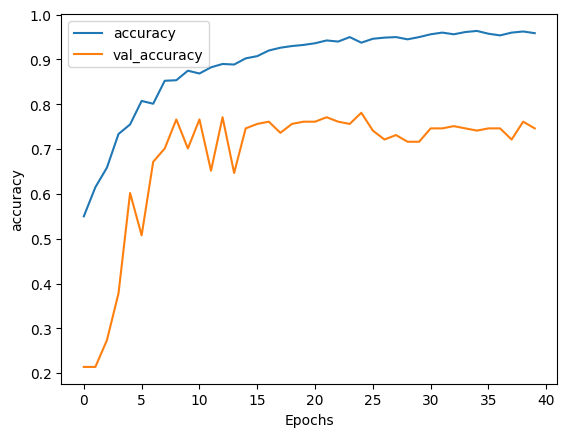

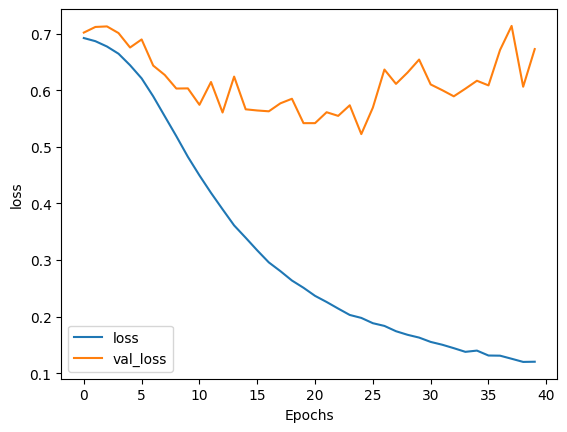

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [13]:

# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1500, 16)


In [14]:

print("Number of embeddings:", len(weights))       # Should be vocab_size
print("Number of words in metadata:", len(word_index))  # May be less than vocab_size


Number of embeddings: 1500
Number of words in metadata: 3131


## 5. Predict sentiment with new reviews

In [18]:
# Example new reviews (Taglish style) for delivery of clothes/shoes
fake_reviews = ['I love this phone', 'I love kwek kwek',
                'Everything was cold',
                'Everything was hot exactly as I wanted',
                'hindi kasya sakin yung damit ang sikip ako ay naiinis',
                'masarap yung pagkain sobra nagustohan ko',
                'I love this professor very smart and genuine',
                'ang pogi mo aaminin ko']

print(fake_reviews)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')


['I love this phone', 'I love kwek kwek', 'Everything was cold', 'Everything was hot exactly as I wanted', 'hindi kasya sakin yung damit ang sikip ako ay naiinis', 'masarap yung pagkain sobra nagustohan ko', 'I love this professor very smart and genuine', 'ang pogi mo aaminin ko']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
I love this phone
[0.8117364]


I love kwek kwek
[0.86909837]


Everything was cold
[0.358492]


Everything was hot exactly as I wanted
[0.59013474]


hindi kasya sakin yung damit ang sikip ako ay naiinis
[0.24759051]


masarap yung pagkain sobra nagustohan ko
[0.5607417]


I love this professor very smart and genuine
[0.9894092]


ang pogi mo aaminin ko
[0.6057523]


